## introduction aux concepts de base de la programmation orientée objet avec Python

### Classe Point

#### On définit un objet point par son abcisse, son ordonnée et son nom


Attributs et méthodes

In [1]:
from math import *
import numpy as np

class Point:
    def __init__(self,x,y, nom):
        self.__x = x*1.0
        self.__y = y*1.0
        self.__name=nom
        self._poids=6.0
        self._color='gold'
        
    def get_x(self):
        return self.__x
    
    def get_y(self):
        return self.__y
    
    def get_name(self):
        return self.__name
    
    def set_poids(p:float):
        self.__poids = p
    
    def __str__(self):
        return "("+str(self.__x)+","+str(self.__y)+")"
    
    def translate(self, dx, dy):
        self.__x += dx
        self.__y += dy
        
    def multiply(self,alpha):
        self.__x *=alpha
        self.__y *=alpha
        
    def rotate(self, p_rot, alpha:float):
        p_1 = Point(self.__x - p_rot.__x, self.__y - p_rot.__y,'p_1')
        module = p_1.distance(Point(0,0,'Origine'))
        alpha_1 = np.arcsin(p_1.get_x()/module)
        if p_1.get_y()<0:
            alpha_1 *=-1
        self.__x = module*sin(alpha_1 + alpha)
        self.__y = module*cos(alpha_1 + alpha)
        
    def distance(self, p2):
        return sqrt((self.__x -p2.get_x())**2 + (self.__y -p2.get_y())**2)
        
    def trace(self, axe):
        axe.scatter(self.__x,self.__y, label=self.__name)
    
    def trace_2(self, axe):
        axe.scatter(self.__x,self.__y, label=self.__name, s = 10*self._poids**2,color=[self._color])

In [2]:
p1 = Point(10,10, 'p1')
p2 = Point(80,40,"p2")

print("Distance entre",p1,"et",p2,":",p1.distance(p2))

p2.translate(0,20)

print(p1.distance(p2))   
p2.translate(0,-20)
p1.rotate(Point(0,0,'Origine'),0.1)
print(p1)

Distance entre (10.0,10.0) et (80.0,40.0) : 76.15773105863909
86.02325267042627
(10.948375819248538,8.951707486311978)


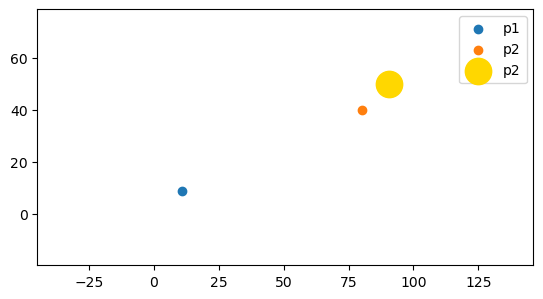

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # Create a figure containing a single axes.
p1.trace(ax)
p2.trace(ax)
p2.translate(10.5,10)
p2.trace_2(ax)
ax.legend()
ax.set_aspect(aspect = 'equal')
ax.margins(0.7)
plt.show()

### Classe Rectangle

In [4]:
class Rectangle:
    def __init__(self, p1:Point,p2:Point, nom:str):
        self.__p1 = Point(min(p1.get_x(),p2.get_x()),max(p1.get_y(),p2.get_y()),p1.get_name())
        self.__p2 = Point(max(p1.get_x(),p2.get_x()),min(p1.get_y(),p2.get_y()),p2.get_name())
        self.__name = nom
        
    def get_p1(self):
        return self.__p1
    
    
    def get_p2(self):
        return self.__p2
    
    def get_name(self):
        return self.__name
    
    def get_longueur(self):
        return self.__p2.get_x() - self.__p1.get_x()

    def get_hauteur(self):
        return self.__p1.get_y() - self.__p2.get_y()
    
    def get_aire(self):
        return self.get_hauteur() * self.get_longueur()
    
    def get_perimetre(self):
        return 2*(self.get_hauteur() + self.get_longueur)
        
    def trace(self,axe):
        axe.plot([self.get_p1().get_x(), self.get_p2().get_x(),self.get_p2().get_x(),self.get_p1().get_x(),self.get_p1().get_x()],
                 [self.get_p1().get_y(),self.get_p1().get_y(),self.get_p2().get_y(),self.get_p2().get_y(),self.get_p1().get_y()],label=self.get_name())        

In [5]:
r1 = Rectangle(p1,p2,"r1")
print(p1, p2)
print(r1.get_p1(), r1.get_p2())
print("Hauteur =",r1.get_hauteur()," Longueur =",r1.get_longueur())

(10.948375819248538,8.951707486311978) (90.5,50.0)
(10.948375819248538,50.0) (90.5,8.951707486311978)
Hauteur = 41.048292513688025  Longueur = 79.55162418075146


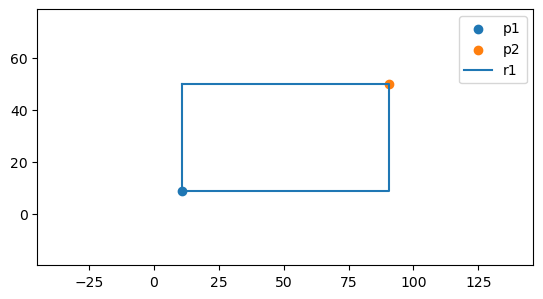

In [6]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
p1.trace(ax)
p2.trace(ax)
r1.trace(ax)
ax.legend()
ax.set_aspect(aspect = 'equal')
ax.margins(0.7)
plt.show()

#### Classe Polygone

In [7]:
class Polygone:
    

    
    def __init__(self, liste:list,nom:str):
        self.poly = liste
        self.name = nom
        self.bary = self.get_barycentre()
    
    def get_name(self):
        return self.name
    
    def get_perimetre(self):
        return sum([self.poly[i].distance(self.poly[i+1]) for i in range(len(self.poly)-1)])+ \
    self.poly[len(self.poly)-1].distance(self.poly[0])
        

    def get_barycentre(self):
        bary = Point(0,0,'barycentre')
        for p in self.poly:
            bary.translate(p.get_x(),p.get_y())
        bary.multiply(1/len(self.poly))
        return bary
            
        
    def trace(self,axe):
        coord_x = []
        coord_y=[]
        for p in self.poly:
            coord_x.append(p.get_x())
            coord_y.append(p.get_y())
        coord_x.append(self.poly[0].get_x())
        coord_y.append(self.poly[0].get_y())
        axe.plot(coord_x,coord_y,label=self.get_name())        
        

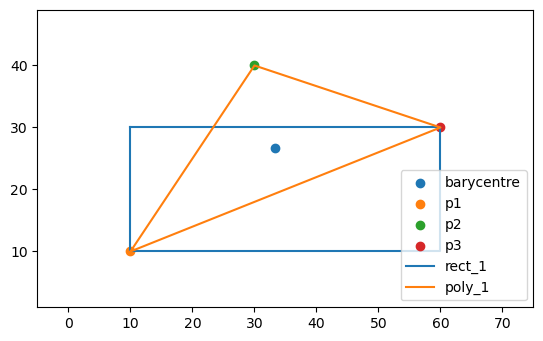

Périmètre : 121.52993742766873


In [8]:
p1 = Point(10,10, 'p1')
p2 = Point(30,40,"p2")
p3 = Point(60,30,'p3')
poly_1 = Polygone([p1,p2,p3],'poly_1')
bary_1 = poly_1.get_barycentre()

rect_1= Rectangle(p1,p3,'rect_1')
fig, ax = plt.subplots()  # Create a figure containing a single axes.
bary_1.trace(ax)
p1.trace(ax)
p2.trace(ax)
p3.trace(ax)
rect_1.trace(ax)
poly_1.trace(ax)
ax.set_aspect(aspect = 'equal')
ax.margins(0.3)
ax.legend()
plt.show()
print('Périmètre :',poly_1.get_perimetre())

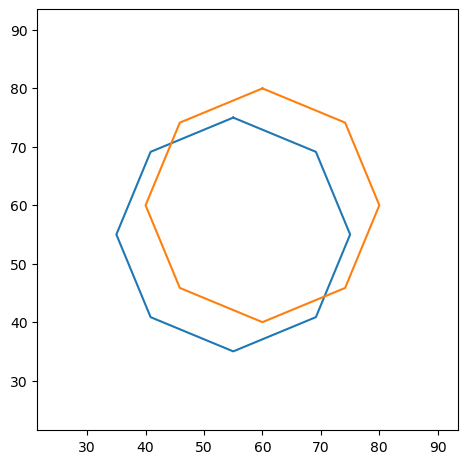

In [9]:
from matplotlib.animation import FuncAnimation
import time

points = []
centre = Point(50,50,'centre')
nb_sommets = 8
rayon = 20
for i in range(nb_sommets):
    points.append(Point(centre.get_x()+rayon*sin(i*2*pi/nb_sommets),\
                        centre.get_y()+rayon*cos(i*2*pi/nb_sommets),'pt_'+str(i)))

poly_1 = Polygone(points,'poly_1')

fig, ax = plt.subplots()  # Create a figure containing a single axes.
# points[0].trace(ax)


# poly_1.trace(ax)
# ax.legend()
# ax.legend(loc = 'upper right')
ax.margins(0.3)
ax.set_aspect(aspect = 'equal')
fig.tight_layout(rect = [0, 0, 1, 1])

def animate(i):
    for j in range(len(poly_1.poly)):
        poly_1.poly[j].translate(5,5)
        # poly_1.poly[j].rotate(poly_1.bary(),0.1)
    # ax.clear()
    # return poly_1.trace(ax)
    
    coord_x = []
    coord_y=[]
    for p in poly_1.poly:
        coord_x.append(p.get_x())
        coord_y.append(p.get_y())
    coord_x.append(poly_1.poly[0].get_x())
    coord_y.append(poly_1.poly[0].get_y())
    return ax.plot(coord_x,coord_y)
    
ani = FuncAnimation(fig, animate, frames=20,  blit=True, interval=500, repeat=False)

plt.show()